In [1]:
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("dataDraft1.csv")
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,Left,Forward,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,Right,Forward,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,Right,Forward,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,Right,GK,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,Right,MidFielder,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [3]:
potentail_overall=data.iloc[:,[4,5]]
potentail_overall.head()

,Overall,Potential
0,94,94
1,94,94
2,92,93
3,91,93
4,91,92


In [4]:
# clustering level 1
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
kmeans=KMeans(n_clusters=3).fit(potentail_overall)
labels=pd.DataFrame(kmeans.labels_)
labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
# Mapping for good ,medium and avg player to corresponding indexs

dic={}
dic['good']=0
dic['avg']=7650
dic['poor']=17750
dic

{'good': 0, 'avg': 7650, 'poor': 17750}

In [7]:
# finding the cluster id of the players
good=labels.iloc[dic['good'],0]
avg=labels.iloc[dic['avg'],0]
poor=labels.iloc[dic['poor'],0]

In [8]:
t1=(labels==good)
t2=(labels==poor)
t3=(labels==avg)
t2=t2.to_numpy()
t3=t3.to_numpy()
t1=t1.to_numpy()
print(len(t1),len(t2),len(t3))

17918 17918 17918


In [9]:
indgood=[]
indavg=[]
indpoor=[]
for i in range(len(t1)):
    if t1[i][0]==True:
        indgood.append(i)
    elif t2[i][0]==True:
        indpoor.append(i)
    else:
        indavg.append(i)

good_players=data.iloc[indgood,:]
avg_players=data.iloc[indavg,:]
poor_players=data.iloc[indpoor,:]

In [10]:
#good_players.head()
#avg_players
poor_players.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
9770,186112,J. Akinde,28,England,65,65,Lincoln City,550.0,Right,Forward,...,70.0,58.0,37.0,33.0,31.0,12.0,15.0,6.0,14.0,16.0
9771,200449,D. McGregor,32,Scotland,65,65,Hibernian,300.0,Right,Defender,...,43.0,63.0,59.0,66.0,63.0,11.0,12.0,10.0,16.0,10.0
9774,236545,Teixeira José,28,Brazil,65,65,Pohang Steelers,425.0,Right,Defender,...,36.0,62.0,60.0,64.0,60.0,7.0,10.0,9.0,11.0,5.0
9775,188417,A. Fernández,32,Uruguay,65,65,San Martin de Tucumán,400.0,Right,MidFielder,...,59.0,65.0,45.0,53.0,46.0,8.0,8.0,6.0,11.0,13.0
9780,156675,A. Considine,31,Scotland,65,65,Aberdeen,350.0,Left,Defender,...,38.0,64.0,67.0,67.0,65.0,8.0,15.0,12.0,11.0,10.0


In [11]:
# PCA Clusetring In good Players

pca = PCA(n_components=3)
pca_g = pca.fit_transform(good_players.iloc[:,10:])
goodplayers = pd.DataFrame(pca_g)

kmeans_good=KMeans(n_clusters=4).fit(goodplayers)
good_labels=pd.DataFrame(kmeans_good.labels_)
good_labels.head()

,0
0,2
1,2
2,2
3,0
4,1


In [12]:
good_players_dic={}
good_players_dic['Forward']=0
good_players_dic['GK']=3
good_players_dic["MidFielder"]=4
good_players_dic["Defender"]=44

good_players_dic

{'Forward': 0, 'GK': 3, 'MidFielder': 4, 'Defender': 44}

In [13]:
# finding the cluster id of the players
frw=good_labels.iloc[good_players_dic['Forward'],0]
gk=good_labels.iloc[good_players_dic['GK'],0]
mid=good_labels.iloc[good_players_dic['MidFielder'],0]
defe=good_labels.iloc[good_players_dic['Defender'],0]

frw=(good_labels==frw)
gk=(good_labels==gk)
mid=(good_labels==mid)
defe=(good_labels==defe)

frw=frw.to_numpy()
gk=gk.to_numpy()
mid=mid.to_numpy()
defe=defe.to_numpy()

print(len(frw),len(gk),len(defe),len(mid))


4199 4199 4199 4199


In [14]:
indgoodfrw=[]
indgoodgk=[]
indgooddefe=[]
indgoodmid=[]

for i in range(len(frw)):
    if frw[i][0]==True:
        indgoodfrw.append(i)
    elif gk[i][0]==True:
        indgoodgk.append(i)
    elif defe[i][0]==True:
        indgooddefe.append(i)
    else:
        indgoodmid.append(i)

visualize_good_players=good_players.copy()
visualize_good_players['PCA1']=goodplayers.iloc[:,0]
visualize_good_players['PCA2']=goodplayers.iloc[:,1]
visualize_good_players['PCA3']=goodplayers.iloc[:,2]

good_forwards=visualize_good_players.iloc[indgoodfrw,:]
good_defenders=visualize_good_players.iloc[indgooddefe,:]
good_midfielders=visualize_good_players.iloc[indgoodmid,:]
good_gk=visualize_good_players.iloc[indgoodgk,:]



In [15]:
#good_gk
#good_midfielders
#good_defenders
#good_forwards

In [16]:
cluster_centers=kmeans_good.cluster_centers_
cluster_centers

array([[223.36727624, -23.93367972, -14.97514518],
       [-38.77967128,  21.16570475, -14.18960602],
       [-25.08843546, -52.38584263,  10.0382302 ],
       [ 17.33011662,  68.62628622,  15.14546772]])

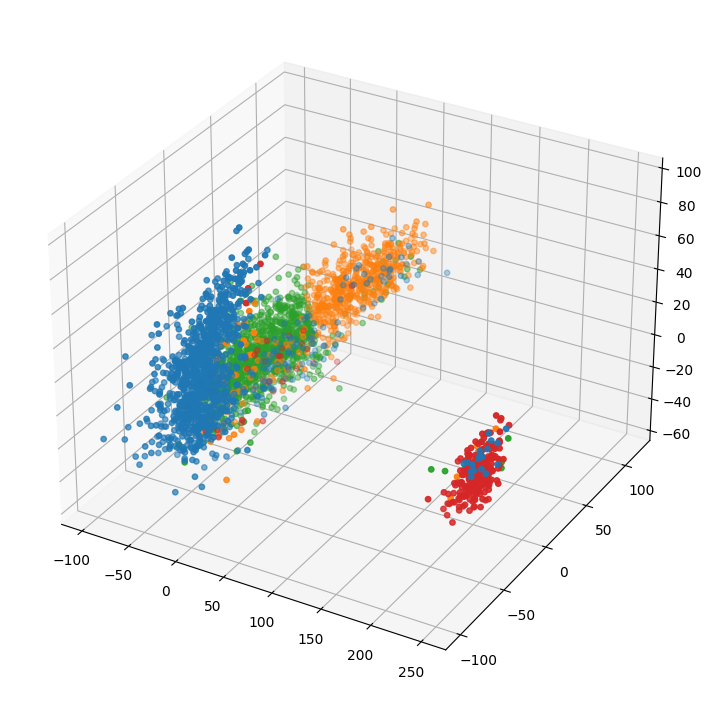

In [93]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
#ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],s=50,c=['black'])
ax.scatter(good_forwards['PCA1'],good_forwards['PCA2'],good_forwards['PCA3'], s=15) #blue
ax.scatter(good_defenders['PCA1'],good_defenders['PCA2'],good_defenders['PCA3'],s=15) #orange
ax.scatter(good_midfielders['PCA1'],good_midfielders['PCA2'],good_midfielders['PCA3'],s=15) #green
ax.scatter(good_gk['PCA1'],good_gk['PCA2'],good_gk['PCA3'],s=15) #red

plt.show()

In [17]:
# PCA Clusetring In Avg Players

pca = PCA(n_components=3)
pca_a = pca.fit_transform(avg_players.iloc[:,10:])
avgplayers = pd.DataFrame(pca_a)

kmeans_avg=KMeans(n_clusters=4).fit(avgplayers)
avg_labels=pd.DataFrame(kmeans_avg.labels_)
avg_labels.head()

,0
0,2
1,2
2,0
3,3
4,0


In [18]:
avg_players.iloc[10,:10]

ID                       190471
Name                  B. Parker
Age                          32
Nationality        South Africa
Overall                      72
Potential                    72
Club              Kaizer Chiefs
Value                    2500.0
Preferred Foot             Left
Position             MidFielder
Name: 3193, dtype: object

In [19]:
# Id of players

avg_players_dic={}
avg_players_dic['Forward']=1 # set
avg_players_dic['GK']=10
avg_players_dic["MidFielder"]=3# set
avg_players_dic["Defender"]=0

avg_players_dic

{'Forward': 1, 'GK': 10, 'MidFielder': 3, 'Defender': 0}

In [20]:
# finding the cluster id of the players
frw=avg_labels.iloc[avg_players_dic['Forward'],0]
gk=avg_labels.iloc[avg_players_dic['GK'],0]
mid=avg_labels.iloc[avg_players_dic['MidFielder'],0]
defe=avg_labels.iloc[avg_players_dic['Defender'],0]

frw=(avg_labels==frw)
gk=(avg_labels==gk)
mid=(avg_labels==mid)
defe=(avg_labels==defe)

frw=frw.to_numpy()
gk=gk.to_numpy()
mid=mid.to_numpy()
defe=defe.to_numpy()

print(len(frw),len(gk),len(defe),len(mid))

8299 8299 8299 8299


In [21]:
indavgfrw=[]
indavggk=[]
indavgdefe=[]
indavgmid=[]

for i in range(len(frw)):
    if frw[i][0]==True:
        indavgfrw.append(i)
    elif gk[i][0]==True:
        indavggk.append(i)
    elif defe[i][0]==True:
        indavgdefe.append(i)
    else:
        indavgmid.append(i)

visualize_avg_players=avg_players.copy()
visualize_avg_players['PCA1']=avgplayers.iloc[:,0]
visualize_avg_players['PCA2']=avgplayers.iloc[:,1]
visualize_avg_players['PCA3']=avgplayers.iloc[:,2]

avg_forwards=visualize_avg_players.iloc[indavgfrw,:]
avg_defenders=visualize_avg_players.iloc[indavgdefe,:]
avg_midfielders=visualize_avg_players.iloc[indavgmid,:]
avg_gk=visualize_avg_players.iloc[indavggk,:]

In [22]:
avg_gk
# avg_midfielders
# # avg_forwards
# # avg_defenders

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PCA1,PCA2,PCA3
3176,199940,J. Cuevas,30,Argentina,72,72,CD Everton de Viña del Mar,2900.0,Left,Forward,...,52.0,49.0,15.0,13.0,8.0,13.0,16.0,-12.928199,43.144947,2.629259
3183,176901,H. Droguett,35,Chile,72,72,CD Universidad de Concepción,1400.0,Left,MidFielder,...,36.0,31.0,16.0,10.0,6.0,7.0,7.0,-25.575737,36.926897,-13.603375
3184,200966,B. Corgnet,31,France,72,72,RC Strasbourg Alsace,2700.0,Right,MidFielder,...,49.0,42.0,15.0,15.0,8.0,14.0,6.0,-52.316398,12.158493,-12.822072
3185,203782,A. Benali,26,Libya,72,73,Crotone,3600.0,Right,MidFielder,...,48.0,56.0,8.0,8.0,5.0,9.0,13.0,-29.117715,6.829767,29.484411
3186,204550,V. Ibarbo,28,Colombia,72,72,Sagan Tosu,3200.0,Right,Forward,...,41.0,38.0,4.0,4.0,4.0,4.0,4.0,-31.970964,34.544643,-23.952210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,240107,J. Padilla,19,Mexico,57,76,Pachuca,220.0,Right,Forward,...,30.0,27.0,13.0,7.0,7.0,6.0,8.0,NaN,NaN,NaN
16473,237886,C. Goslin,18,United States,56,78,Atlanta United,200.0,Right,MidFielder,...,45.0,43.0,9.0,5.0,15.0,7.0,12.0,NaN,NaN,NaN
16482,243524,S. Grønli,17,Norway,56,77,Tromsø IL,200.0,Right,Forward,...,15.0,16.0,5.0,5.0,13.0,10.0,7.0,NaN,NaN,NaN
16597,245152,S. Giménez,17,Mexico,56,79,Cruz Azul,200.0,Right,Forward,...,14.0,13.0,6.0,14.0,12.0,6.0,10.0,NaN,NaN,NaN


In [23]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131, projection='3d')
#ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],s=50,c=['black'])
ax.scatter(avg_forwards['PCA1'],avg_forwards['PCA2'],avg_forwards['PCA3'], s=15) #blue
ax.scatter(avg_defenders['PCA1'],avg_defenders['PCA2'],avg_defenders['PCA3'],s=15) #orange
ax.scatter(avg_midfielders['PCA1'],avg_midfielders['PCA2'],avg_midfielders['PCA3'],s=15) #green
ax.scatter(avg_gk['PCA1'],avg_gk['PCA2'],avg_gk['PCA3'],s=15) #red

plt.show()

NameError: name 'plt' is not defined

In [24]:
# PCA Clusetring In Poor Players

pca = PCA(n_components=3)
pca_p = pca.fit_transform(poor_players.iloc[:,10:])
poorplayers = pd.DataFrame(pca_p)

kmeans_poor=KMeans(n_clusters=4).fit(poorplayers)
poor_labels=pd.DataFrame(kmeans_poor.labels_)
poor_labels.head()

,0
0,3
1,2
2,0
3,0
4,2


In [25]:
poor_players.iloc[1,:10]
# 0

ID                     200449
Name              D. McGregor
Age                        32
Nationality          Scotland
Overall                    65
Potential                  65
Club                Hibernian
Value                   300.0
Preferred Foot          Right
Position             Defender
Name: 9771, dtype: object

In [26]:
# Id of players

poor_players_dic={}
poor_players_dic['Forward']=0
poor_players_dic['GK']=12
poor_players_dic["MidFielder"]=3
poor_players_dic["Defender"]=1

poor_players_dic

{'Forward': 0, 'GK': 12, 'MidFielder': 3, 'Defender': 1}

In [27]:
# Id of players

poor_players_dic={}
a,b,c,d=0,0,0,0
for i in range(len(poor_players)):
    if poor_players.iloc[i,9]=='Defender' and a==0:
        poor_players_dic["Defender"]=i
        a=1
    elif poor_players.iloc[i,9]=='Defender' and b==0:
        poor_players_dic["MidFielder"]=i
        b=1
    elif poor_players.iloc[i,9]=='Forward' and c==0:
        poor_players_dic['Forward']=i
        c=1
    elif poor_players.iloc[i,9]=='GK' and d==0:
        poor_players_dic['GK']=i
        d=1    
    if a==1 and b==1 and c==1 and d==1:
        break
poor_players_dic

{'Forward': 0, 'Defender': 1, 'MidFielder': 2, 'GK': 12}

In [28]:
# finding the cluster id of the players
frw=poor_labels.iloc[poor_players_dic['Forward'],0]
gk=poor_labels.iloc[poor_players_dic['GK'],0]
mid=poor_labels.iloc[poor_players_dic['MidFielder'],0]
defe=poor_labels.iloc[poor_players_dic['Defender'],0]

frw=(poor_labels==frw)
gk=(poor_labels==gk)
mid=(poor_labels==mid)
defe=(poor_labels==defe)

frw=frw.to_numpy()
gk=gk.to_numpy()
mid=mid.to_numpy()
defe=defe.to_numpy()

print(len(frw),len(gk),len(defe),len(mid))

5420 5420 5420 5420


In [29]:
indpoorfrw=[]
indpoorgk=[]
indpoordefe=[]
indpoormid=[]

for i in range(len(frw)):
    if frw[i][0]==True:
        indpoorfrw.append(i)
    elif gk[i][0]==True:
        indpoorgk.append(i)
    elif defe[i][0]==True:
        indpoordefe.append(i)
    else:
        indpoormid.append(i)

visualize_poor_players=poor_players.copy()
visualize_poor_players['PCA1']=poorplayers.iloc[:,0]
visualize_poor_players['PCA2']=poorplayers.iloc[:,1]
visualize_poor_players['PCA3']=poorplayers.iloc[:,2]

poor_forwards=visualize_poor_players.iloc[indpoorfrw,:]
poor_defenders=visualize_poor_players.iloc[indpoordefe,:]
poor_midfielders=visualize_poor_players.iloc[indpoormid,:]
poor_gk=visualize_poor_players.iloc[indpoorgk,:]

poorplayers

,0,1,2
0,-46.914161,-30.853009,33.983796
1,-24.786726,47.502528,18.560185
2,-54.583793,24.414535,-27.095675
3,-79.286772,-15.951901,31.663473
4,-30.614865,70.675309,15.576842
...,...,...,...
5415,0.204204,7.602228,-22.227727
5416,32.881249,-27.094745,13.602007
5417,12.518387,-46.468368,-27.461734
5418,7.184552,-41.586172,-18.193822


In [30]:
poor_gk
#poor_midfielders
#poor_forwards
#poor_defenders

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PCA1,PCA2,PCA3
9810,181001,B. Knighton,33,United States,65,65,New England Revolution,270.0,Right,GK,...,12.0,12.0,67.0,65.0,63.0,64.0,60.0,NaN,NaN,NaN
9812,118794,A. Lonergan,34,England,65,65,Middlesbrough,220.0,Left,GK,...,15.0,14.0,65.0,62.0,52.0,65.0,67.0,NaN,NaN,NaN
9814,171019,D. Forde,38,Republic of Ireland,65,65,Cambridge United,40.0,Right,GK,...,20.0,19.0,64.0,65.0,64.0,68.0,63.0,NaN,NaN,NaN
9825,209166,M. Malaeka,32,Saudi Arabia,65,65,Al Faisaly,300.0,Right,GK,...,18.0,12.0,65.0,63.0,66.0,62.0,67.0,NaN,NaN,NaN
9828,110606,A. Mannus,36,Northern Ireland,65,65,Shamrock Rovers,70.0,Right,GK,...,20.0,13.0,66.0,66.0,62.0,68.0,63.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17889,243158,L. Wahlstedt,18,Sweden,48,65,Dalkurd FF,50.0,Right,GK,...,11.0,10.0,47.0,46.0,50.0,45.0,51.0,NaN,NaN,NaN
17891,221669,M. Hurst,22,Scotland,48,58,St. Johnstone FC,40.0,Right,GK,...,15.0,16.0,45.0,49.0,50.0,50.0,45.0,NaN,NaN,NaN
17894,53748,K. Pilkington,44,England,48,48,Cambridge United,0.0,Right,GK,...,15.0,13.0,45.0,48.0,44.0,49.0,46.0,NaN,NaN,NaN
17905,245862,J. Milli,18,Italy,47,65,Lecce,50.0,Right,GK,...,10.0,11.0,52.0,52.0,52.0,40.0,44.0,NaN,NaN,NaN
